# **Problem 1**

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


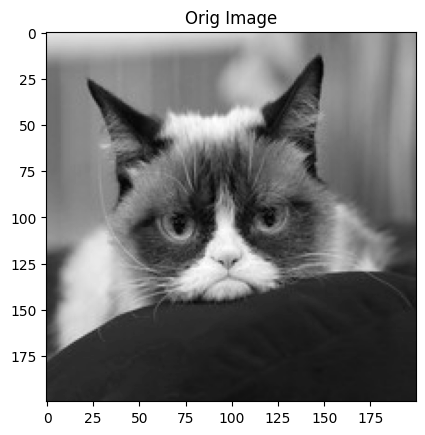

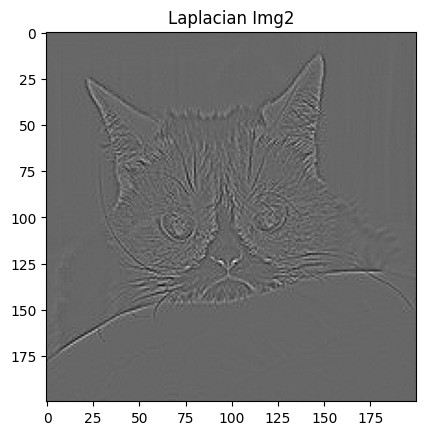

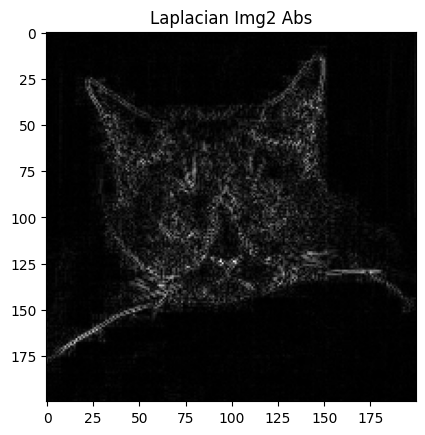

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount("/content/gdrive")

img = cv2.imread('/content/gdrive/MyDrive/ColabNotebooks/sizedgrumpycat.jpg', cv2.IMREAD_GRAYSCALE)
plt.title('Orig Image')
plt.imshow(img, cmap='gray')
plt.show()

img2 = cv2.Laplacian(img, cv2.CV_64F)
plt.imshow(img2, cmap='gray')
plt.title('Laplacian Img2')
plt.show()


img2abs = cv2.convertScaleAbs(img2)
plt.title('Laplacian Img2 Abs')
plt.imshow(img2abs, cmap='gray')
plt.show()

# **Problem2**


In [48]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images , train_labels ), (test_images , test_labels ) = mnist.load_data()
train_images = train_images.reshape ((60000, 28, 28,1))
train_images = train_images.astype ('float32') / 255
test_images= test_images.reshape ((10000, 28, 28, 1))
test_images= test_images.astype ('float32') / 255
train_labels= to_categorical (train_labels)
test_labels= to_categorical (test_labels)
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [49]:
print(train_labels[0,:])
print(train_labels[1,:])
print(train_labels[2,:])
print(train_labels[3,:])
print(train_labels[4,:])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [50]:
print(train_images.shape)

(60000, 28, 28, 1)


In [ ]:
print(train_images [0,:,:,:])

In [ ]:
print(test_images [0,:,:,:])

In [53]:
print(test_labels [0,:])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [54]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3, 3), activation='relu', input_shape =(28, 28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3),  activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images , train_labels , epochs=5, batch_size =64)

Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 0.1738 - accuracy: 0.9462
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0489 - accuracy: 0.9849
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0342 - accuracy: 0.9890
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0263 - accuracy: 0.9919
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0215 - accuracy: 0.9935


In [55]:
test_loss , test_acc = model.evaluate (test_images , test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0242 - accuracy: 0.9918


0.9918000102043152

# **Problem 2 Kernel 4x4 for 2nd and 3rd convolutional layers **

In [56]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3, 3), activation='relu', input_shape =(28, 28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (4, 4),  activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images , train_labels , epochs=5, batch_size =64)

Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 0.1538 - accuracy: 0.9528
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0461 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0307 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0226 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0169 - accuracy: 0.9951


In [57]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 64)        32832     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 2, 2, 64)          65600     
                                                                 
 flatten_7 (Flatten)         (None, 256)              

# **Detailed Explanation of the trainable parameters:**
 1) For Conv2d_6:
        The Kernel size is 3*3 = 9.
        # of sub layers is 32
        # of Params = (kernel size * # of sub layers) + bias (which is # of sub-layers)
        Therefore,
        # of Params = (9 * 32) + 32 = 320

2) max_pooling2d_4: As it is down sampling the parameters are 0.

3) For Conv2d_7:
        The Kernel size is 4*4 = 16.
        # of sub layers from prior layer is 32
        # of sub layers is 64
        layer pair = 64 * 32 = 2048
        # of Params = (kernel size * # of sub layer pairs) + bias (which is # of sub-layers)
        Therefore,
        # of Params = (16 * 2048) + 64= 32,832

4) max_pooling2d_5: As it is down sampling the parameters are 0.

5) For Conv2d_8:
        The Kernel size is 4*4 = 16.
        # of sub layers from prior layer is 64
        # of sub layers is 64
        layer pair = 64 * 64 = 4096
        # of Params = (kernel size * # of sub layer pairs) + bias (which is # of sub-layers)
        Therefore,
        # of Params = (16 * 4096) + 64= 65,600

6) flatten_2 (Flatten):As it is down sampling the parameters are 0.

7) dense_3:
        # of sub layers from prior layer is 256
        # of sub layers is 10
        layer pair = 256 * 10 = 2560
        # of Params = ( # of sub layer pairs) + bias (which is # of sub-layers)
        Therefore,
        # of Params = (2560) + 10 = 2570

**Total # of parameters = 320 + 0 + 32,832 + 0 + 65,600 + 0 + 2570 = 101322**


In [58]:
test_loss , test_acc = model.evaluate (test_images , test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0307 - accuracy: 0.9897


0.9897000193595886

# **Problem 3**

In [59]:
import tensorflow as tf
from tensorflow import keras

# 5.1 - Introduction to convnets

This notebook contains the code sample found in Chapter 5, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

First, let's take a practical look at a very simple convnet example. We will use our convnet to classify MNIST digits, a task that you've already been
through in Chapter 2, using a densely-connected network (our test accuracy then was 97.8%). Even though our convnet will be very basic, its
accuracy will still blow out of the water that of the densely-connected model from Chapter 2.

The 6 lines of code below show you what a basic convnet looks like. It's a stack of `Conv2D` and `MaxPooling2D` layers. We'll see in a
minute what they do concretely.
Importantly, a convnet takes as input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension).
In our case, we will configure our convnet to process inputs of size `(28, 28, 1)`, which is the format of MNIST images. We do this via
passing the argument `input_shape=(28, 28, 1)` to our first layer.

In [60]:
from tensorflow.keras import layers
from tensorflow.keras import models

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of our convnet so far:

In [61]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 5574

You can see above that the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape `(height, width, channels)`. The width
and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to
the `Conv2D` layers (e.g. 32 or 64).

The next step would be to feed our last output tensor (of shape `(3, 3, 64)`) into a densely-connected classifier network like those you are
already familiar with: a stack of `Dense` layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor.
So first, we will have to flatten our 3D outputs to 1D, and then add a few `Dense` layers on top:

In [62]:
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(64, activation='relu'))
model1.add(keras.layers.Dense(10, activation='softmax'))

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network
looks like:

In [63]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_8 (Flatten)         (None, 576)              

As you can see, our `(3, 3, 64)` outputs were flattened into vectors of shape `(576,)`, before going through two `Dense` layers.

Now, let's train our convnet on the MNIST digits. We will reuse a lot of the code we have already covered in the MNIST example from Chapter
2.

In [64]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [65]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28, 1)
(60000, 10)


In [66]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28, 1)
(10000, 10)


In [67]:
print(type(train_images))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [68]:
print(test_labels[0:10,:])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [69]:
model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model1.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 5s 3ms/step - loss: 0.1777 - accuracy: 0.9444
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0486 - accuracy: 0.9845
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0338 - accuracy: 0.9892
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0251 - accuracy: 0.9919
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0197 - accuracy: 0.9938


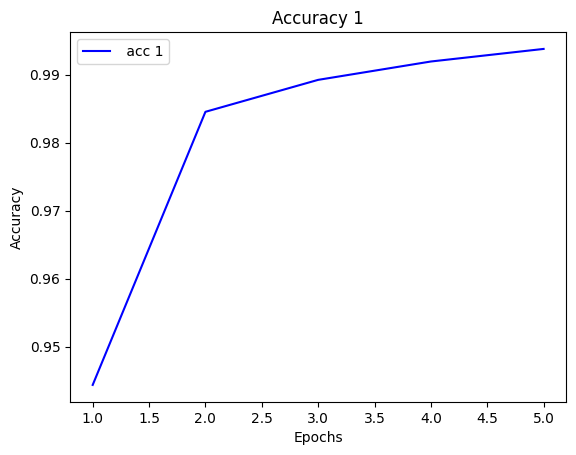

In [70]:


acc1 = history.history['accuracy']

epochs = range(1, len(acc1) + 1)
plt.plot(epochs, acc1, 'b-', label=' acc 1')

plt.title('Accuracy 1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Let's evaluate the model on the test data:

In [71]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0306 - accuracy: 0.9916


In [72]:
test_acc

0.991599977016449

While our densely-connected network from Chapter 2 had a test accuracy of 97.8%, our basic convnet has a test accuracy of 99.3%: we
decreased our error rate by 68% (relative). Not bad!

# **Problem 3A 4x4**

In [73]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

#model.summary()

In [74]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


print(train_images.shape)
print(train_labels.shape)

model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model2.fit(train_images, train_labels, epochs=5, batch_size=64)

test_loss, test_acc = model2.evaluate(test_images, test_labels)
test_acc

(60000, 28, 28, 1)
(60000, 10)
Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.1793 - accuracy: 0.9433
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0444 - accuracy: 0.9864
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0325 - accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0238 - accuracy: 0.9926
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0275 - accuracy: 0.9912


0.9911999702453613

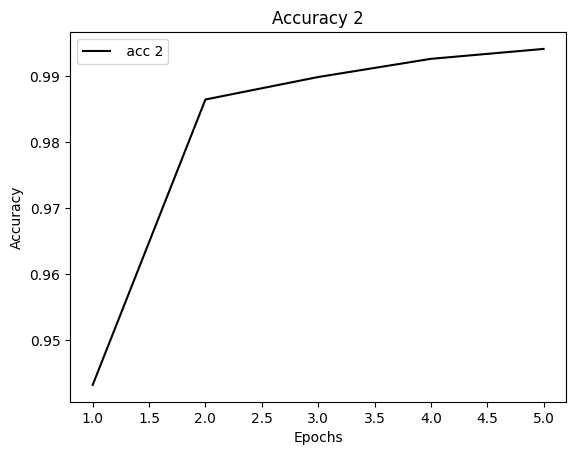

In [75]:


acc2 = history.history['accuracy']

epochs = range(1, len(acc2) + 1)
plt.plot(epochs, acc2, 'k-', label=' acc 2')

plt.title('Accuracy 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# **Problem 3B 5x5**

In [76]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(64, activation='relu'))
model3.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 64)        32832     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 2, 2, 64)          65600     
                                                                 
 flatten_7 (Flatten)         (None, 256)              

In [77]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


print(train_images.shape)
print(train_labels.shape)

model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history=model3.fit(train_images, train_labels, epochs=5, batch_size=64)

test_loss, test_acc = model3.evaluate(test_images, test_labels)
test_acc

(60000, 28, 28, 1)
(60000, 10)
Epoch 1/5
938/938 [==============================] - 5s 3ms/step - loss: 0.1711 - accuracy: 0.9459
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0463 - accuracy: 0.9853
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0324 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0248 - accuracy: 0.9923
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0345 - accuracy: 0.9901


0.9901000261306763

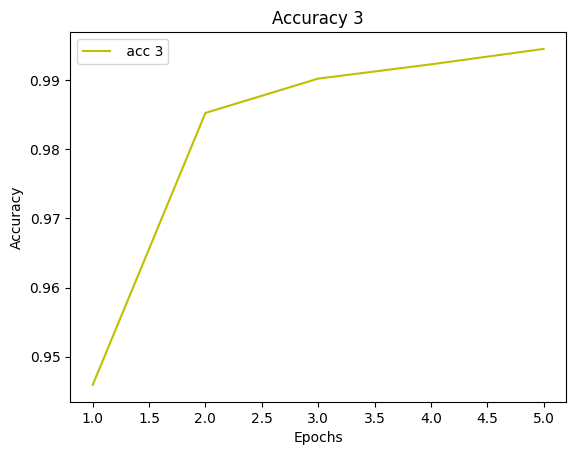

In [78]:


acc3 = history.history['accuracy']

epochs = range(1, len(acc3) + 1)
plt.plot(epochs, acc3, 'y-', label=' acc 3')

plt.title('Accuracy 3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# **Problem 3C 6x6**

In [79]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (6, 6), activation='relu', input_shape=(28, 28, 1)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(64, activation='relu'))
model4.add(keras.layers.Dense(10, activation='softmax'))

model4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 23, 23, 32)        1184      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 11, 11, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 2, 2, 64)          36928     
                                                                 
 flatten_11 (Flatten)        (None, 256)             

In [80]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


print(train_images.shape)
print(train_labels.shape)

model4.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history=model4.fit(train_images, train_labels, epochs=5, batch_size=64)

test_loss, test_acc = model4.evaluate(test_images, test_labels)
test_acc

(60000, 28, 28, 1)
(60000, 10)
Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.2037 - accuracy: 0.9375
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0563 - accuracy: 0.9829
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0387 - accuracy: 0.9883
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0288 - accuracy: 0.9911
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0353 - accuracy: 0.9884


0.9883999824523926

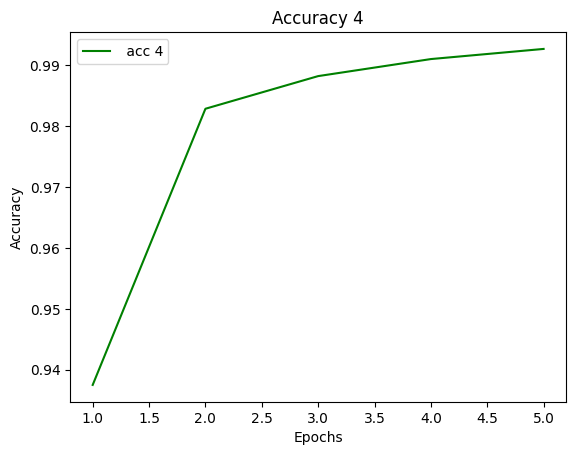

In [81]:


acc4 = history.history['accuracy']

epochs = range(1, len(acc4) + 1)
plt.plot(epochs, acc4, 'g-', label=' acc 4')

plt.title('Accuracy 4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

[0.944350004196167, 0.9845166802406311, 0.989216685295105, 0.9919166564941406, 0.9937666654586792]
[0.9432500004768372, 0.9864166378974915, 0.9898166656494141, 0.9925666451454163, 0.9940666556358337]
[0.945900022983551, 0.9852833151817322, 0.9902499914169312, 0.9923166632652283, 0.9945499897003174]
[0.9375, 0.9828833341598511, 0.9882500171661377, 0.9910500049591064, 0.9927166700363159]


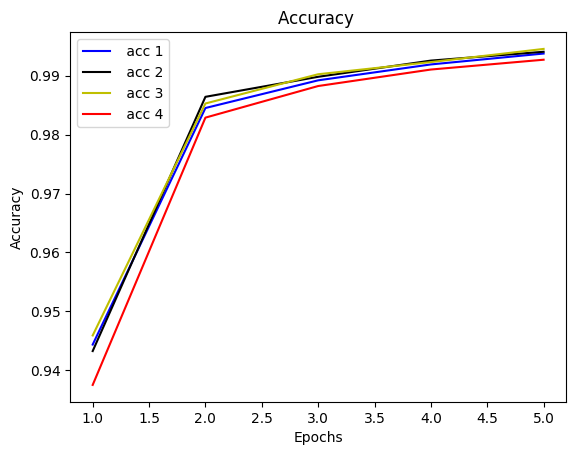

In [82]:


print(acc1)
print(acc2)
print(acc3)
print(acc4)
plt.plot(epochs, acc1, 'b-', label=' acc 1')
plt.plot(epochs, acc2, 'k-', label=' acc 2')
plt.plot(epochs, acc3, 'y-', label=' acc 3')
plt.plot(epochs, acc4, 'r-', label=' acc 4')

plt.title('Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Based on the above Epochs vs Accuracy Model 3 with 4x4 kernel for the first convolutional  layer has the highest accuracy at 99.45%. So Model2 is the best model.

# **Problem 4**

In [83]:
!pip install opencv-python

Input Sequence from below cell output


/content/gdrive/MyDrive/ColabNotebooks/Digits/0a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/1a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/2a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/3a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/4a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/5a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/6a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/7a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/8a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/0b.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/1b.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/2b.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/3b.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/4b.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/6b.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/7b.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/8b.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/5b.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/9a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/9b.jpg

In [84]:
test3_labels = np.array([
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
  ])

print(test3_labels)
print(type(test3_labels))
print(test3_labels.shape)

[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1]]
<class 'numpy.ndarray'>
(20, 10)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ColabNotebooks/Digits/0a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/1a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/2a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/3a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/4a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/5a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/6a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/7a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/8a.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/0b.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/1b.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/2b.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/3b.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/4b.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/6b.jpg
/content/gdrive/MyDrive/ColabNotebooks/Digits/7b.jpg
/content/gdrive/MyDri

<ipython-input-85-163904a702fa>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cv_img_np = np.array(cv_img)


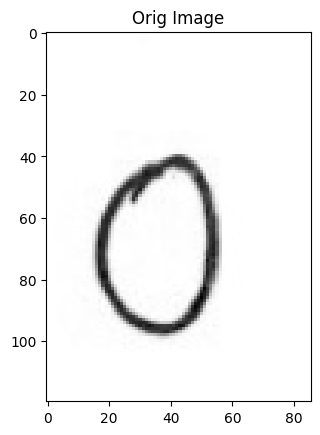

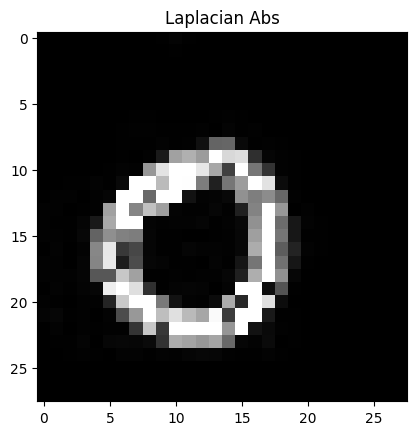

Image Dimension    :  (28, 28)


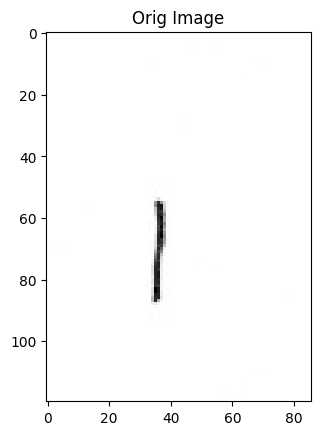

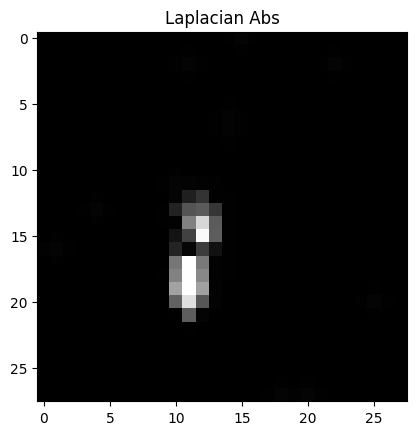

Image Dimension    :  (28, 28)


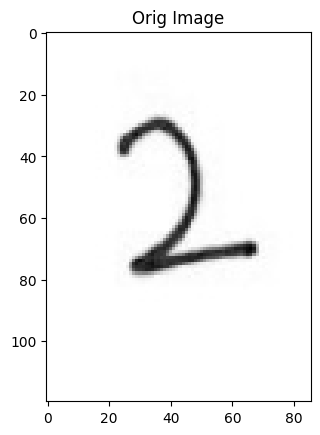

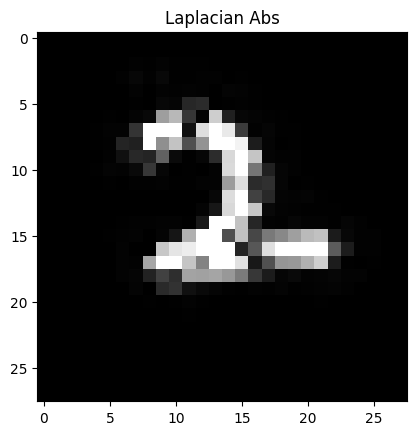

Image Dimension    :  (28, 28)


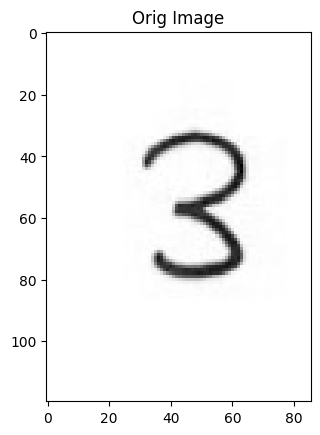

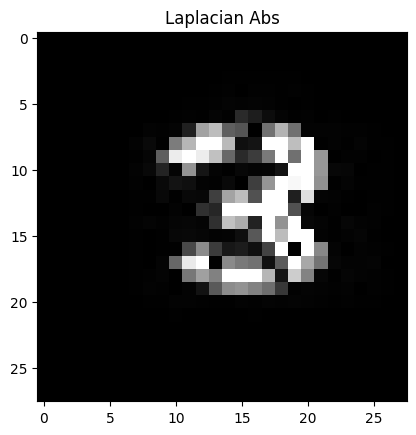

Image Dimension    :  (28, 28)


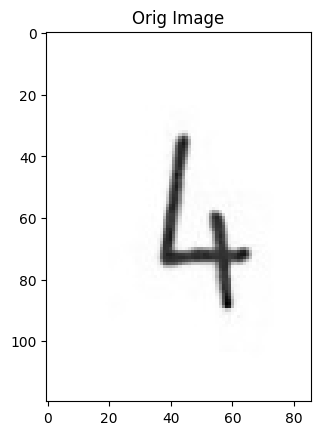

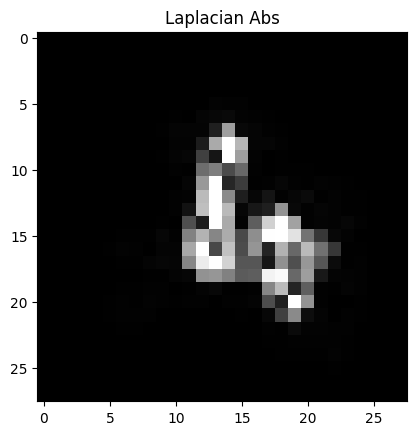

Image Dimension    :  (28, 28)


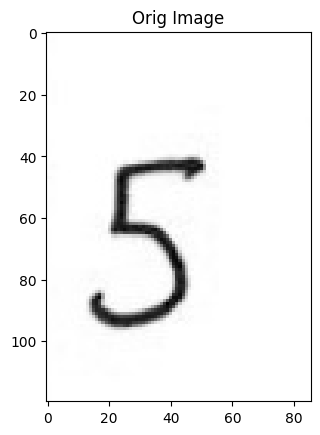

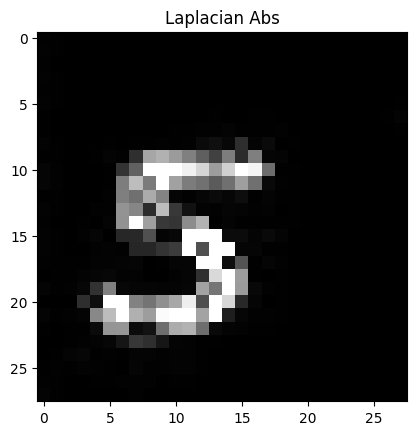

Image Dimension    :  (28, 28)


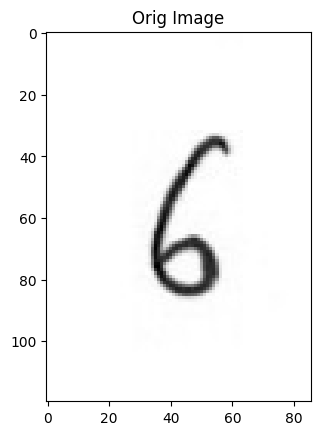

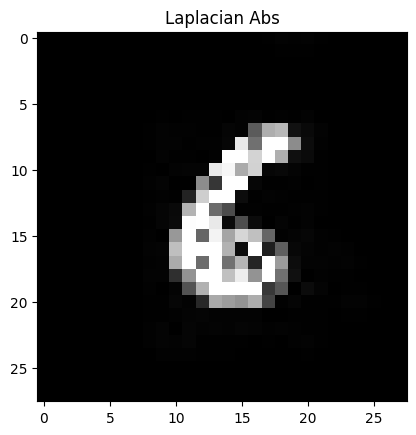

Image Dimension    :  (28, 28)


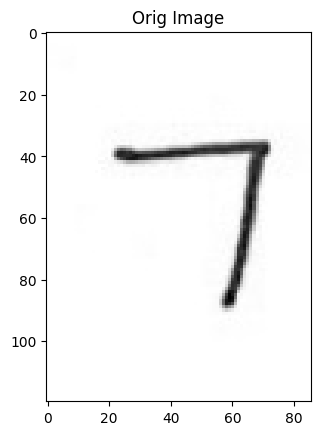

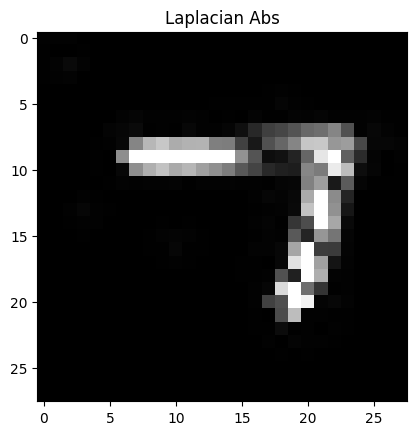

Image Dimension    :  (28, 28)


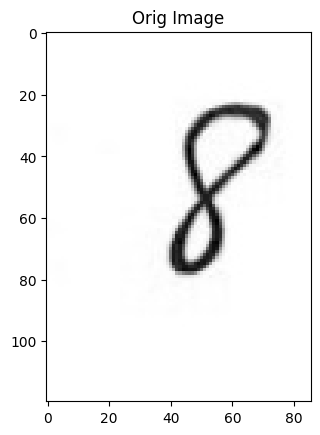

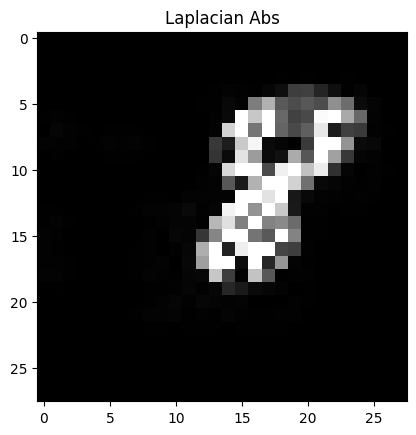

Image Dimension    :  (28, 28)


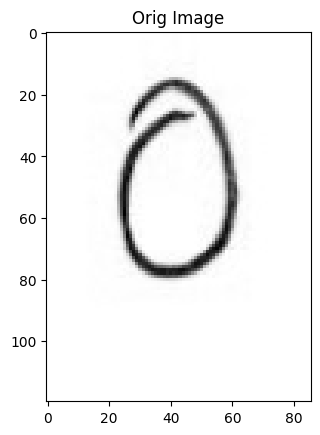

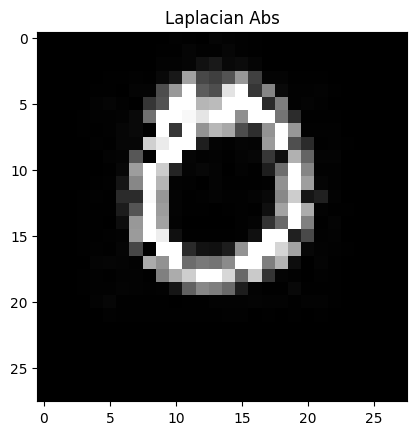

Image Dimension    :  (28, 28)


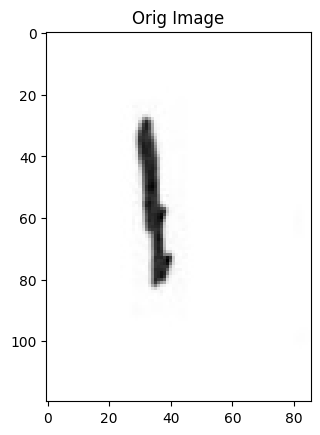

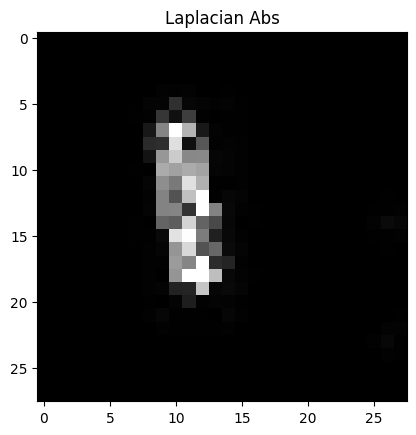

Image Dimension    :  (28, 28)


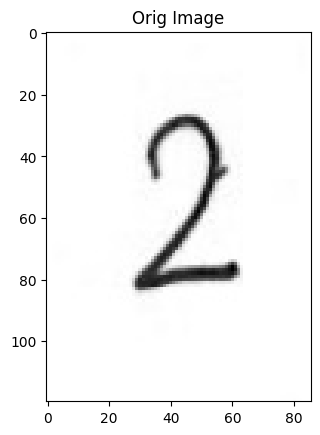

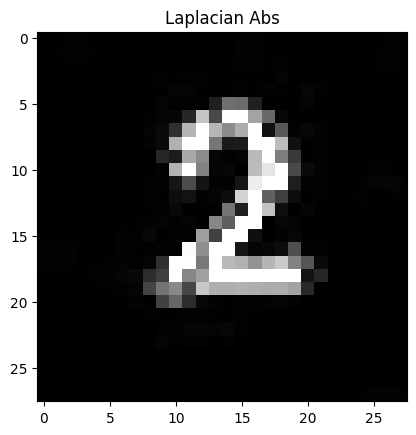

Image Dimension    :  (28, 28)


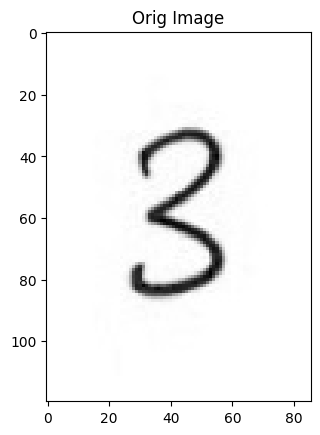

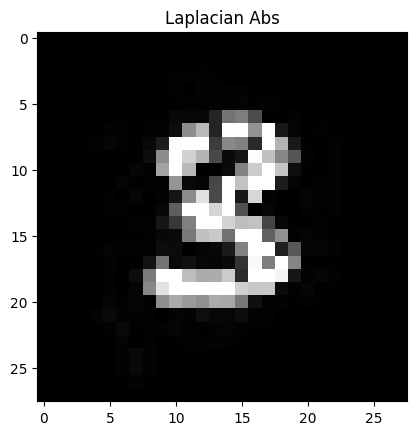

Image Dimension    :  (28, 28)


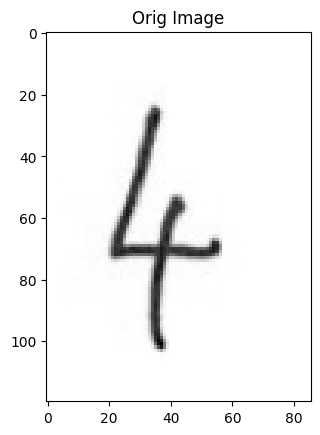

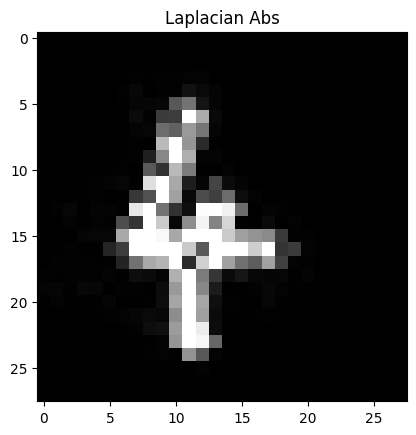

Image Dimension    :  (28, 28)


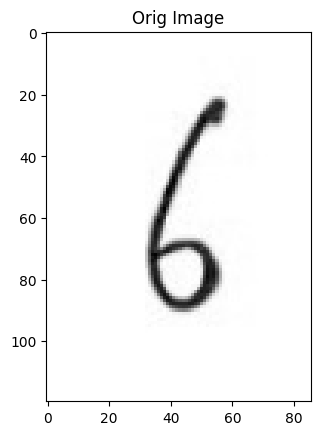

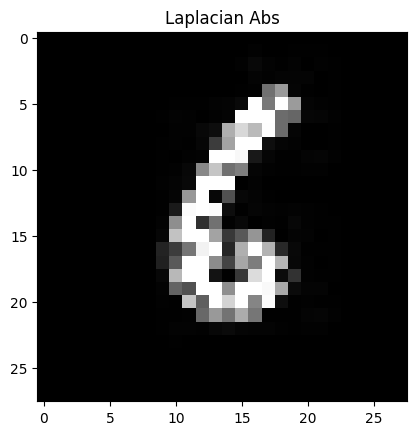

Image Dimension    :  (28, 28)


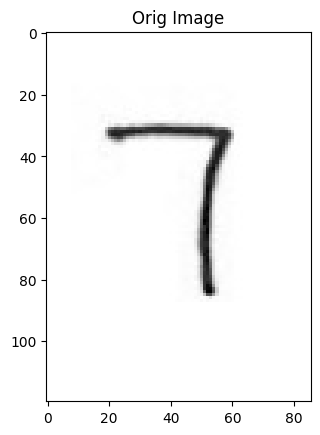

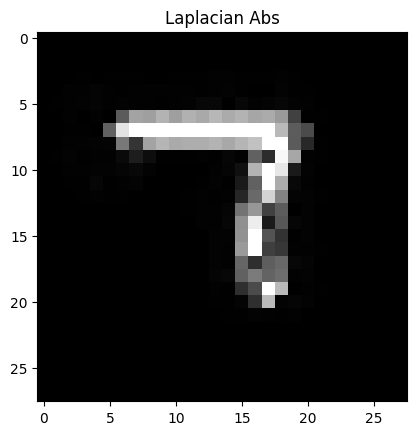

Image Dimension    :  (28, 28)


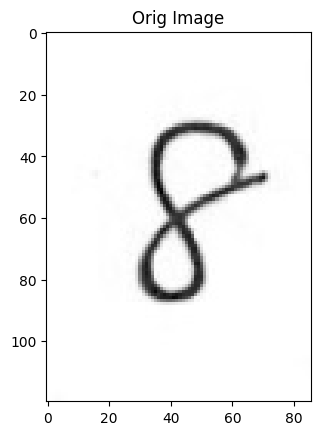

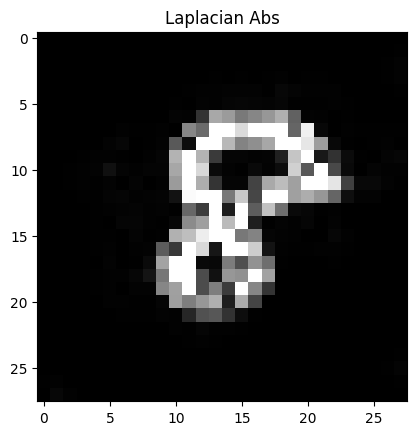

Image Dimension    :  (28, 28)


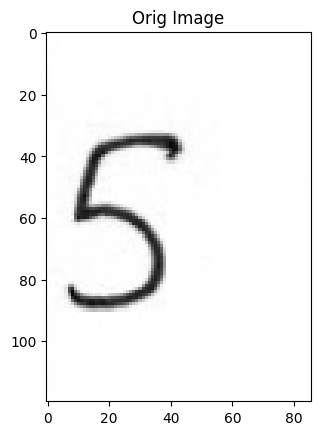

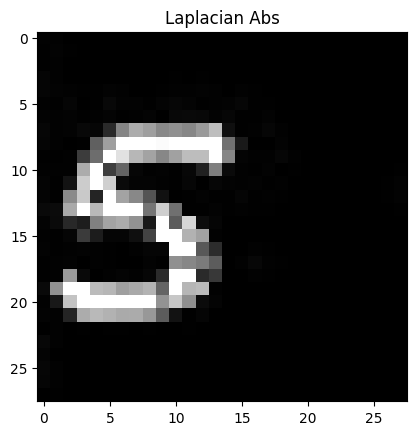

Image Dimension    :  (28, 28)


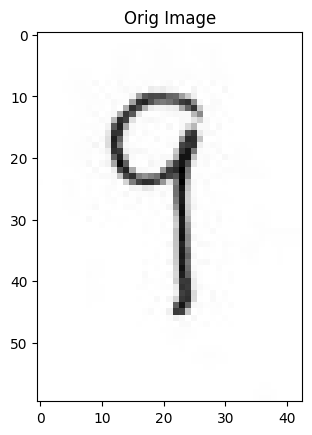

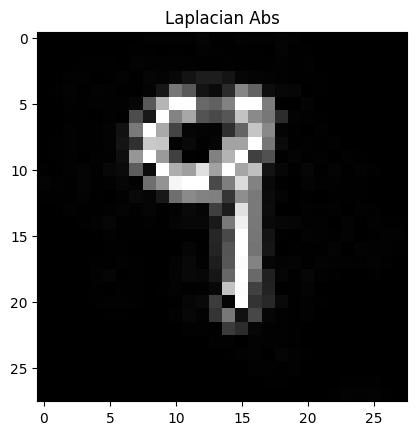

Image Dimension    :  (28, 28)


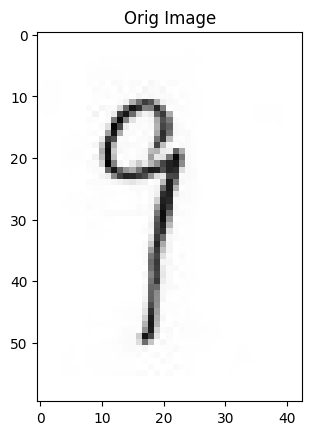

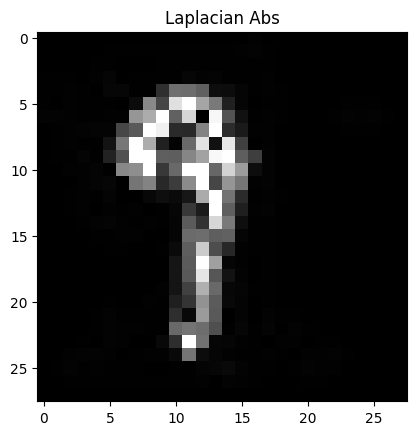

Image Dimension    :  (28, 28)


In [85]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount("/content/gdrive")

cv_img = []
for img in glob.glob("/content/gdrive/MyDrive/ColabNotebooks/Digits/*"):
    print(img)
    n= np.array(cv2.imread(img, cv2.IMREAD_GRAYSCALE))
    #print("n: ", n)
    cv_img.append(n)

#print(cv_img)
print(len(cv_img))
print(type(cv_img))
cv_img_np = np.array(cv_img)
print(type(cv_img_np))

cv_img_abs = []
for img in cv_img_np:

  plt.imshow(img, cmap='gray')
  plt.title('Orig Image')
  plt.show()

  img_size = 28
  resized_img = cv2.resize(img,(img_size,img_size))

  img22 = cv2.Laplacian(resized_img, cv2.CV_64F)
  img22_abs = cv2.convertScaleAbs(img22)


  #plt.imshow(img22, cmap='gray')
  #plt.title('Laplacian Image Resized')
  #plt.show()


  plt.imshow(img22_abs, cmap='gray')
  plt.title('Laplacian Abs')
  plt.show()

  cv_img_abs.append(img22_abs)

  #print('img22_abs: ' , img22_abs)

  dimensions = resized_img.shape
  print('Image Dimension    : ', dimensions , end ='\n')

# **Using Model 3 from problem 3 as it has the highest accuracy.**

In [88]:

test3_labels_tf=tf.constant(test3_labels)
test4_images = tf.constant(cv_img_abs)

test_loss , test_acc = model3.evaluate (test4_images , test3_labels_tf)
test_acc

1/1 [==============================] - 0s 158ms/step - loss: 287.2525 - accuracy: 0.7000


0.699999988079071

In [89]:
output_tf= model3.predict (test4_images )
print(output_tf)
#print(output_tf - test4_labels_tf)


1/1 [==============================] - 0s 72ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


# **Accuracy of the Handwritten digits is at 70%. Apply Laplacian helped increase the accuracy. However, It is only at 70% as it could be as the scanned images were at 200*200dpi and could perform better with higher resolution scanning. **